In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing the data
The data is of used Volkswagen cars from 100,000 UK used car dataset from Kaggle.

In [2]:
df = pd.read_csv('vw.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


# Exploratory Data Analysis

In [3]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


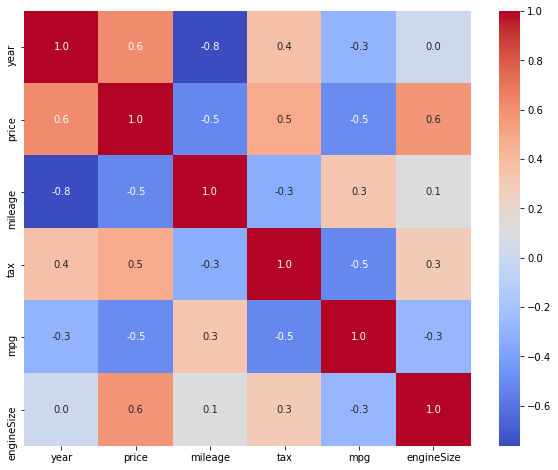

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'coolwarm')
plt.show()

- After year and mileage, tax has the highest multicollinearity. Year and mileage are most important factors in deciding a used car's price. Therefore, tax variable won't be part of the model.
- Mileage and year has highest correlation. It is negatively correlated as higher the odometer reading, cheaper the car and vice versa.
- Year has a positive correlation with price meaning newer the car, higher the price.
- Mpg is negatively correlated to price. Usually cars which are expensive have lower mpg due to more availability of features and superior engine specifications.
- Engine size is positively correlated to price. Engines which are bigger tend to be expensive. 
- Year and engine size have maximum impact on price.

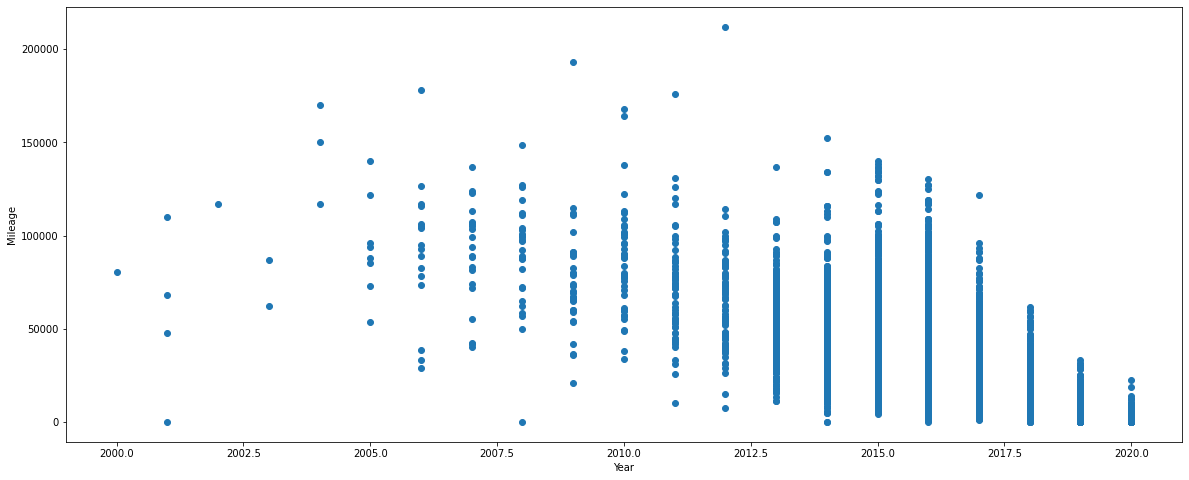

In [8]:
plt.figure(figsize = (20,8))
plt.scatter(df['year'], df['mileage'])
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()

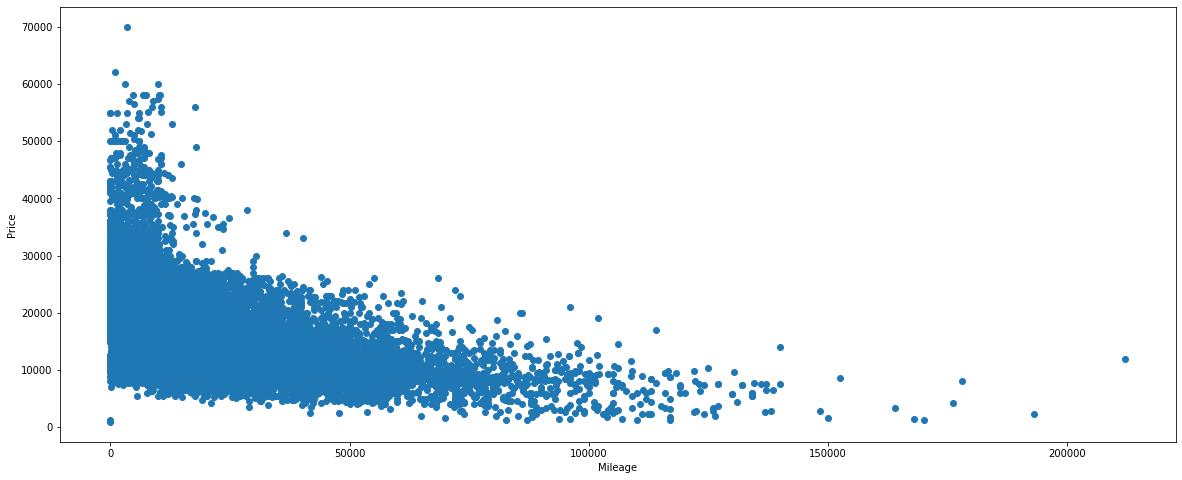

In [9]:
plt.figure(figsize = (20,8))
plt.scatter(df['mileage'], df['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

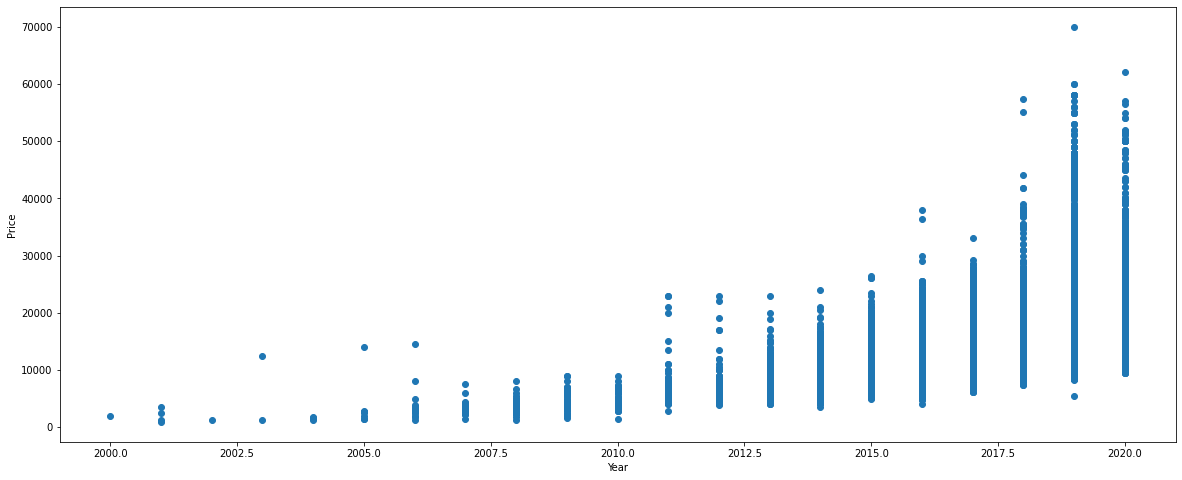

In [10]:
plt.figure(figsize = (20,8))
plt.scatter(df['year'], df['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Grouping by model to know about the different models.

In [11]:
model = df.groupby('model').mean()
model

,year,price,mileage,tax,mpg,engineSize
model,,,,,,
Amarok,2017.819820,27991.495495,21525.990991,260.675676,33.866667,2.783784
Arteon,2018.822581,26285.020161,7390.294355,145.423387,47.352823,1.939516
Beetle,2013.722892,9881.638554,39577.746988,147.228916,50.569880,1.589157
CC,2014.736842,10645.642105,50117.926316,94.789474,57.352632,1.972632
Caddy,2015.166667,12844.000000,38715.166667,173.333333,54.883333,1.933333
Caddy Life,2017.750000,17432.875000,10943.625000,148.750000,52.525000,1.950000
Caddy Maxi,2014.750000,11472.250000,59405.750000,176.250000,51.550000,1.700000
Caddy Maxi Life,2018.576271,19103.118644,11874.728814,147.372881,50.411864,1.959322
California,2019.000000,57593.866667,7422.266667,260.333333,33.740000,2.000000


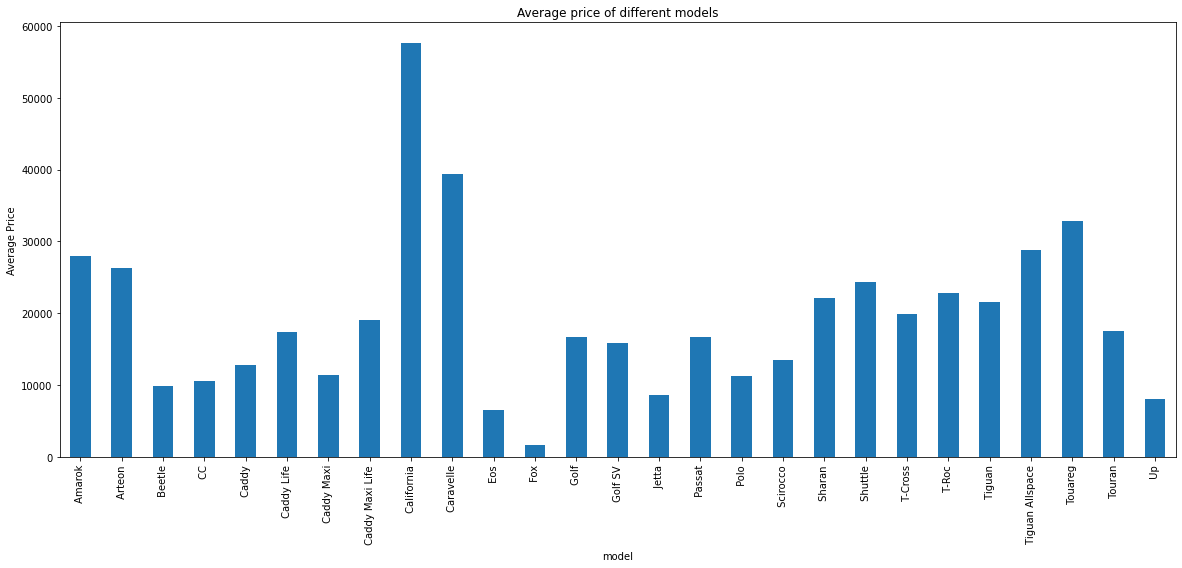

In [12]:
plt.figure(figsize = (20,8))
model['price'].plot.bar()
plt.ylabel('Average Price')
plt.title('Average price of different models')
plt.show()

- The most expensive model is California and the cheapest model is Fox.
- California has the most recent average year and low average mileage. On the other hand Fox has a high average mileage and an earlier average year. Fox is the older model in the lot. This shows the positive correlation between year and price.

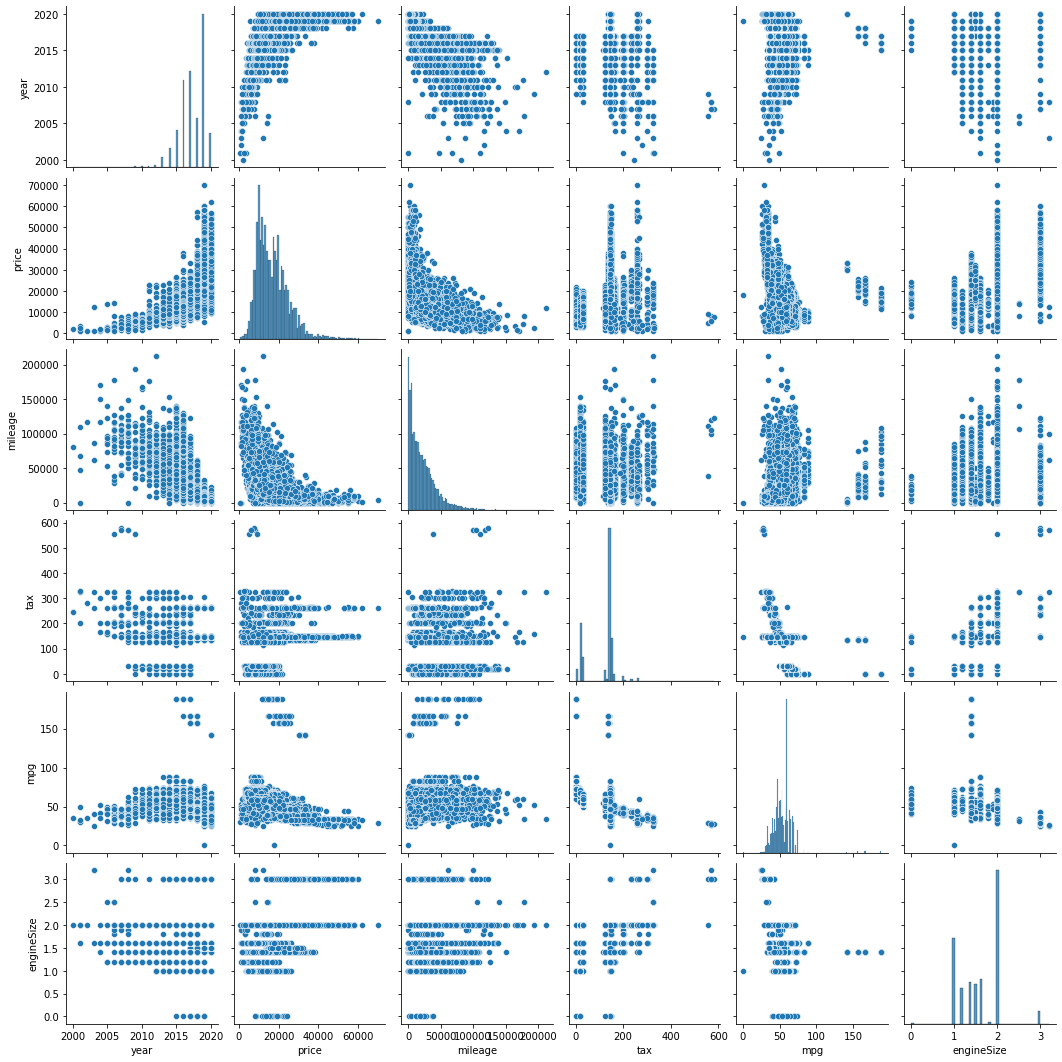

In [13]:
sns.pairplot(df)

# Feature Engineering

Model, transmission and fuel type are categorical values which need to be encoded. It is nominal data hence, using get_dummy from pandas library.

In [14]:
x = pd.get_dummies(df, drop_first = True)
x

,year,price,mileage,tax,mpg,engineSize,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125,58.9,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15153,2008,1799,88102,145,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15154,2009,1590,70000,200,42.0,1.4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15155,2006,1250,82704,150,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


From the pairplot it can be inferred that the data does not have a normal distribution. Also different variables have a different magnitudes. Hence, normalising the data using MinMaxScaler to improve the data integrity.

In [15]:
scaler = MinMaxScaler()
x[['year', 'mileage', 'tax', 'engineSize']] = scaler.fit_transform(x[['year', 'mileage', 'tax', 'engineSize']])
x

,year,price,mileage,tax,mpg,engineSize,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.95,25000,0.065580,0.250000,49.6,0.62500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.95,26883,0.021514,0.250000,49.6,0.62500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.95,20000,0.034967,0.250000,50.4,0.62500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.95,33492,0.022755,0.250000,32.5,0.62500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.95,22900,0.030656,0.258621,39.8,0.46875,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,0.60,5990,0.349054,0.215517,58.9,0.62500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15153,0.40,1799,0.415573,0.250000,46.3,0.37500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15154,0.45,1590,0.330186,0.344828,42.0,0.43750,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15155,0.30,1250,0.390110,0.258621,46.3,0.37500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Splitting data and dropping variables

- Dropping tax variable and separating the independent and dependent variables.
- Splitting the data and allocating 80% data for training and 20% data for cross validation of models.

In [16]:
X = x.drop(['price', 'tax'], axis = 1)
y = x['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_test

7382      6299
6635     22000
13971    29750
7690     10172
1680     36995
         ...  
10156    15490
360      30995
6390     10989
13437    48990
4947     14999
Name: price, Length: 3032, dtype: int64

# Data modelling and evaluation
Using LinearRegression algorithm for linear model and RandomForestRegressor and GradientBoostingRegressor algorithms for non - linear model.

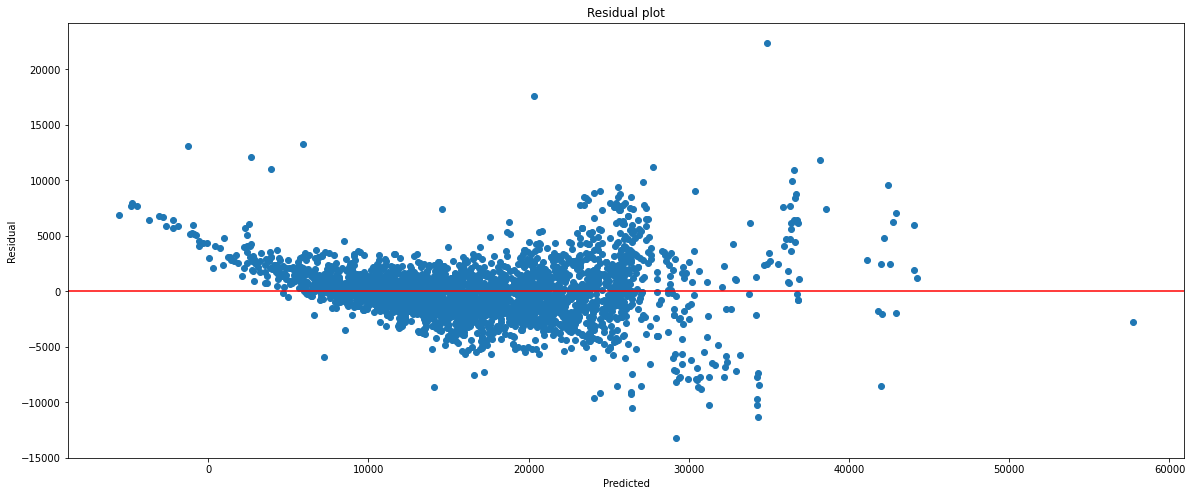

Root mean squared error:  2579.35
Coefficient of determination: 0.88


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lrprediction = lr.predict(X_test)
residuals = y_test - lrprediction

plt.figure(figsize = (20,8))
plt.scatter(lrprediction, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color = 'red')
plt.title('Residual plot')
plt.show()

print('Root mean squared error: ', round(mean_squared_error(y_test, lrprediction, squared=False),2))
print('Coefficient of determination:', round(r2_score(y_test, lrprediction),2))

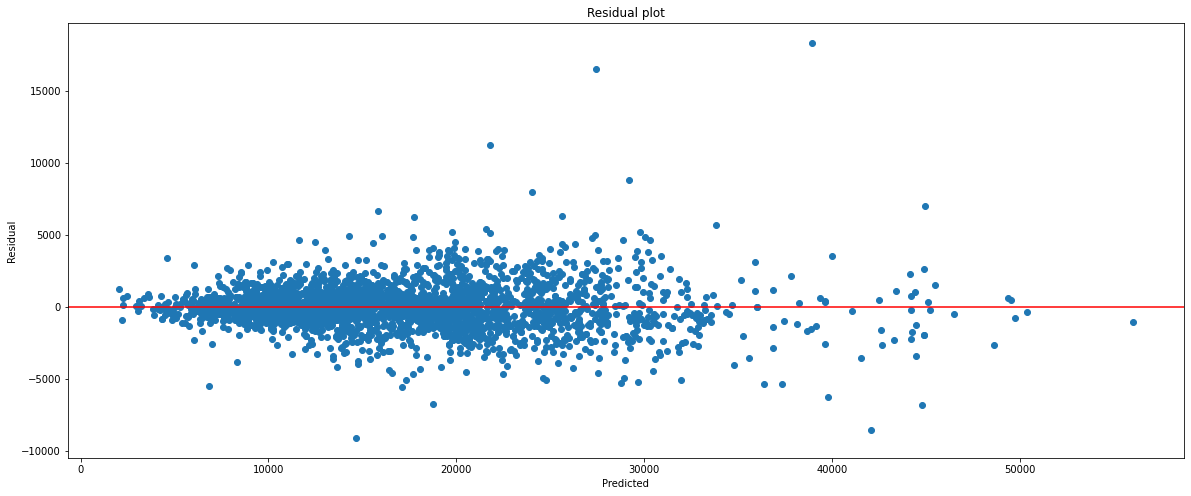

Root mean squared error:  1528.55
Coefficient of determination: 0.96


In [30]:
rfr = RandomForestRegressor(max_depth=15)
rfr.fit(X_train, y_train)
rfrprediction = rfr.predict(X_test)
residuals = y_test - rfrprediction

plt.figure(figsize = (20,8))
plt.scatter(rfrprediction, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color = 'red')
plt.title('Residual plot')
plt.show()

print('Root mean squared error: ', round(mean_squared_error(y_test, rfrprediction, squared=False),2))
print('Coefficient of determination:', round(r2_score(y_test, rfrprediction),2))

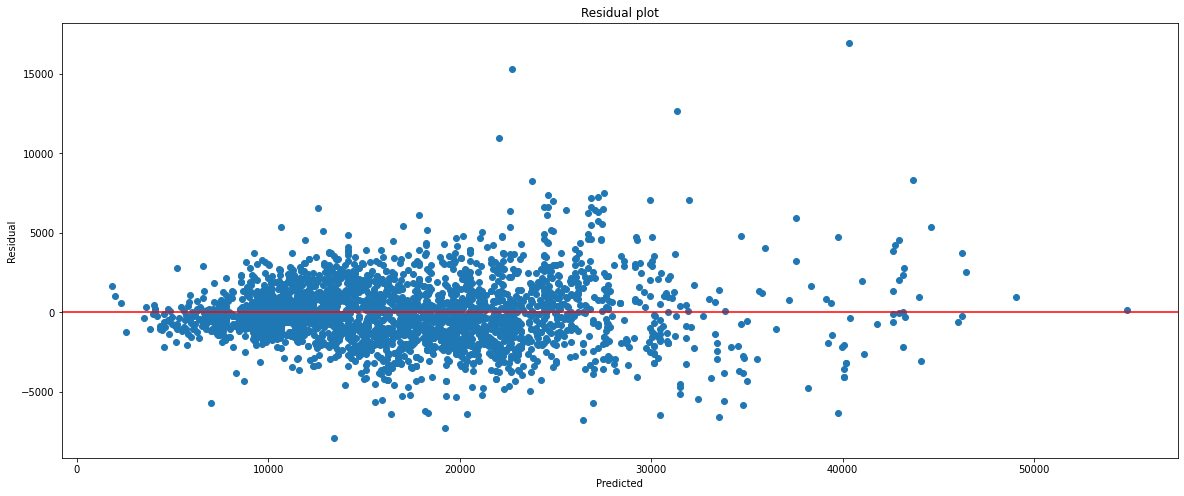

Root mean squared error:  1926.52
Coefficient of determination: 0.93


In [31]:
gbr = GradientBoostingRegressor(loss = 'ls')
gbr.fit(X_train, y_train)
gbrprediction = gbr.predict(X_test)
residuals = y_test - gbrprediction

plt.figure(figsize = (20,8))
plt.scatter(gbrprediction, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color = 'red')
plt.title('Residual plot')
plt.show()

print('Root mean squared error: ', round(mean_squared_error(y_test, gbrprediction, squared=False),2))
print('Coefficient of determination:', round(r2_score(y_test, gbrprediction),2))

The RandomForestRegressor performs best which can be evaluated by the coefficient of determination which indicates how much the model explains the variability of predicted prices from the actual prices. 

# Predictions
Comparing the predictions made using RandomForestRegressor with the actual prices.

In [38]:
v = pd.DataFrame(y_test)
v['prediction'] = rfrprediction
v.tail(20)

,price,prediction
1974,27590,29402.696900
14989,8498,9341.094761
525,25310,26100.414372
10292,29995,30230.612110
5914,15622,14922.403277
8514,9190,9056.654075
12095,9495,7332.246667
13588,17290,16728.442015
6533,16750,17232.538000
2923,10562,11613.770521


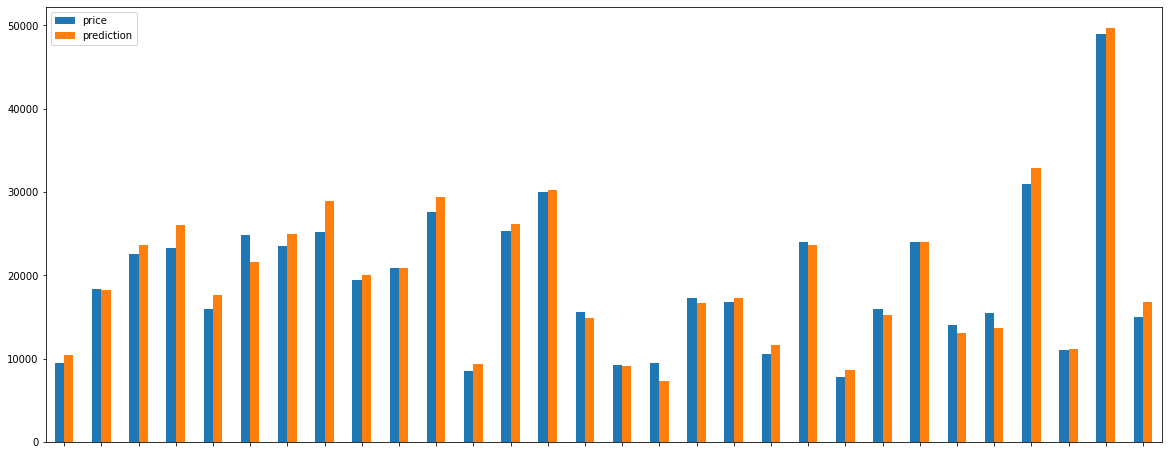

In [39]:
v.tail(30).plot.bar(figsize = (20,8))
plt.tick_params(axis='x', labelbottom=False)
plt.show()